# ASTR8070
## Capstone Project Appendix
#### Niana Mohammed
#### Due 05/06/2022

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import scipy.stats as stats
import glob
import emcee

In [2]:
# Code to make pretty plots (credit: Mallory Molina)
import matplotlib 
size=15
plt.rc('font', size=size)
plt.rc('font', weight='normal')
plt.rcParams.update({
	"xtick.minor.visible": True,
    "xtick.major.size": 10,
    "xtick.major.width": 2,
    "xtick.minor.size": 5,
    "xtick.minor.width": 2,
    "xtick.direction":'in',
    "xtick.top": True,
    "xtick.labelsize": size,
	"ytick.minor.visible": True,
    "ytick.major.size": 10,
    "ytick.major.width": 2,
    "ytick.minor.size": 5,
    "ytick.minor.width": 2,
    "ytick.direction":'in',
    "ytick.right": True,
    "ytick.labelsize": size,
    "axes.linewidth": 2,
    "axes.axisbelow": False
})
plt.rc('ytick',labelsize=size,right=True,direction='in')
plt.rc('axes', labelsize=size)
plt.rc('axes', labelweight='normal')
plt.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# I added this--remove it if it doesn't work
matplotlib.rcParams["font.family"] = "Times New Roman"
plt.ion()

/var/folders/8_/cx8t3z6n4c9ftpn96__x7z5c0000gq/T/ipykernel_84300/1533606638.py:30: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
/var/folders/8_/cx8t3z6n4c9ftpn96__x7z5c0000gq/T/ipykernel_84300/1533606638.py:31: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


## Introduction section of the article

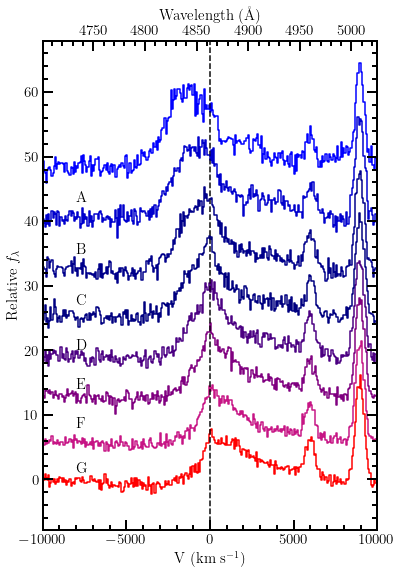

In [8]:
# Plot the simulated spectra

# grab the spectra files
fnamess = glob.glob('../../../../../../Desktop/s*.2ca')
scaling = [-16,-19,-12,-9,8,3,-6,-2] # vertical scaling to see see each spectrum clearly

col = ['mediumvioletred','red','purple','indigo','blue','mediumblue','navy','darkblue']

fig, ax = plt.subplots(figsize=(6, 9))

for j,i in enumerate(fnamess):
#   opening each file and making a separate wavelength and flux array
    fs=open(i,"r")
    liness=fs.readlines()
    wavelengths,wavess=[],[]
    fluxs,fluxess=[],[]
    for x in liness[7:]:
        wavelengths.append(x.split()[0])
        fluxs.append(x.split()[1])
    wavess = [float(j) for j in wavelengths]
    fluxess = [float(j) for j in fluxs]
    hbeta = 4863
    vs = 3*10**5*(np.array(wavess)-hbeta)/hbeta
    
    ax.plot(vs,np.array(fluxess)+scaling[j],c=col[j],drawstyle='steps-mid')
    ax.set_xlabel('V (km s$^{-1}$)',fontsize=15)
    ax.set_ylabel(r'Relative $f_{\lambda}$',fontsize=15)#'Flux (mJy)'
    ax.tick_params(axis = "both", which = "both", top = False)
    ax.axvline(0,c='k',ls='--',alpha=0.2)
    ax.set_xlim(-10000,10000) 

# functions to convert between velocity and wavelength (based on Doppler equation)
# 4863 is rest wavelength of Hβ
def VtoW(x):
    w = 4863*(1+x/(3*10**5))
    return w
def WtoV(x):
    v = 3*10**5*(x-4863)/4863
    return v
secax = ax.secondary_xaxis('top', functions=(VtoW, WtoV))
secax.set_xlabel(r'Wavelength (\AA)')
secax.set_xlim(VtoW(-10000),VtoW(10000))

plt.text(-8000, 43,'A',c='k',fontsize=15)
plt.text(-8000, 35,'B',c='k',fontsize=15)
plt.text(-8000, 27,'C',c='k',fontsize=15)
plt.text(-8000, 20,'D',c='k',fontsize=15)
plt.text(-8000, 14,'E',c='k',fontsize=15)
plt.text(-8000, 8,'F',c='k',fontsize=15)
plt.text(-8000, 1,'G',c='k',fontsize=15)
# plt.savefig("Desktop/sim_spectra.pdf",bbox_inches='tight')
plt.show()

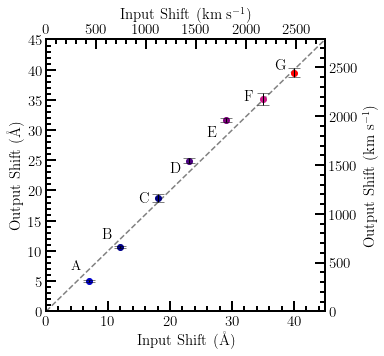

In [29]:
# Shift measurements in Ångstroms, obtained from the minimum of a Χ^2 curve
val = np.array([5.06,10.68,18.79,24.93,31.71,35.10,39.5])
# the 99% confidence interval values obtained from fitting a parabola around the minimum Χ^2
plus = np.array([0.16,0.19,0.59,0.4,0.27,1.18,0.68])
minus = np.array([0.16,0.19,0.73,0.39,0.39,0.73,0.77])
error = ((val+plus)-(val-minus))/2

# the broad Hβ shift values input into the simulated spectra
input_shift = np.array([7,12,18,23,29,35,40])
val_adjust = [int('{:.0f}'.format(i)) for i in val]

col2 = ['mediumblue','darkblue','navy','indigo','purple','mediumvioletred','red']

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot([0,52],[0,52],c='gray',ls='--',zorder=1) # plot a 1:1 line 

for i in range(len(input_shift)):
    ax.scatter(input_shift[i],val[i],c=col2[i],zorder=2)
    (_, caps, _) = ax.errorbar(input_shift[i],val[i], yerr = error[i], c='k',
        capsize=6, elinewidth=1,label='error'+str(i)+'='+str(error[i]))
    for cap in caps:
        cap.set_color('k')
        cap.set_markeredgewidth(0.5)

ax.set_xlabel(r'Input Shift (\AA)',fontsize=15);ax.set_ylabel(r'Output Shift (\AA)',fontsize=15)
ax.tick_params(axis = "both", which = "both", top = False, right = False)
ax.set_xlim(0,45);ax.set_ylim(0,45)

# the first spectrum of J095036 has Hβ centered at this blue-shifted value, rather than 4863
# this is the top most spectrum in the plot on the previous cell
new_w = 4839.76 
input_kms = (2.998*10**5/new_w)*np.array([7,12,18,23,29,35,40])
output_kms = (2.998*10**5/new_w)*np.array(val_adjust)

# Doppler equation (del_lam/lam = v/c)
def delVtoW(x):
    #del_lam = lam*v/c, where lam = new_w
    w = new_w*(x/(2.998*10**5))
    return w
def delWtoV(x):
    #v = c*del_lam/lam, where lam = new_w
    v = 2.998*10**5*(x)/new_w
    return v
secax = ax.secondary_xaxis('top', functions=(delWtoV, delVtoW))
secax.set_xlabel(r'Input Shift (km s$^{-1}$)')
secax = ax.secondary_yaxis('right', functions=(delWtoV, delVtoW))
secax.set_ylabel(r'Output Shift (km s$^{-1}$)')

forplot = np.polyfit([0,45],[0,45],deg=1)
plotfit = np.poly1d(forplot)
plotyloc = plotfit(input_shift)

plt.text(input_shift[0]-3, plotyloc[0],'A',c='k',fontsize=14)
plt.text(input_shift[1]-3, plotyloc[1],'B',c='k',fontsize=15)
plt.text(input_shift[2]-3, plotyloc[2],'C',c='k',fontsize=15)
plt.text(input_shift[3]-3, plotyloc[3],'D',c='k',fontsize=15)
plt.text(input_shift[4]-3, plotyloc[4],'E',c='k',fontsize=15)
plt.text(input_shift[5]-3, plotyloc[5],'F',c='k',fontsize=15)
plt.text(input_shift[6]-3, plotyloc[6],'G',c='k',fontsize=15)

# plt.savefig("../../../../../../Desktop/8070fig1.pdf",bbox_inches='tight')
plt.show()

## Data and Methods section of the article 

Text(0, 0.5, 'data density')

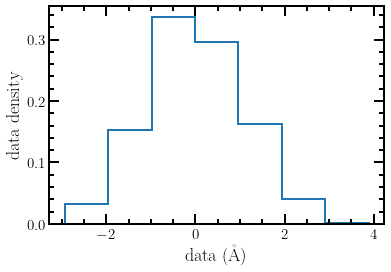

In [3]:
# load the data: the distribution of shift measurements from the MC simulation
data = np.loadtxt("../../../../../../Desktop/save_shift.txt")

_ = plt.hist(data,bins=7,density=True,histtype='step',ls='solid',lw=2)
plt.xlabel('data (\AA)',fontsize=18)
plt.ylabel('data density',fontsize=18)
# plt.savefig('../../../../../../Desktop/8070fig2.pdf',bbox_inches = 'tight')

### Estimations using Markov Chain Monte Carlo (MCMC)
emcee posteriors for $\mu$ and $\sigma$ of the data

In [5]:
# Functions for emcee input
def lnLikelihood(x, data):
    # Gaussian likelihood 
    ll = np.sum(stats.norm.logpdf(data,loc=x[0],scale=x[1]))
    return ll

def lnPrior(x):
    prior_mu = stats.uniform.pdf(x[0], loc=-2.5, scale=5) # -2.5 to 2.5
    prior_sigma = stats.uniform.pdf(x[1], loc=0.1, scale=5) # 0.1 to 4.9
    return np.log(prior_mu * prior_sigma)

def myLogPosterior(x,data):
    return lnLikelihood(x,data) + lnPrior(x)

# EMCEE
ndim = 2  # number of parameters
nwalkers = 12  # number of walkers
nsteps = 10000  # number of MCMC steps to take for each walker

# initialize x 
np.random.seed(0)
starting_guess=[-0.1,2]
# initializing the walkers in a tiny Gaussian ball around the starting_guess values
pos=[starting_guess + 1e-3*np.random.randn(ndim) for i in range(nwalkers)]

# call function
sampler = emcee.EnsembleSampler(nwalkers, ndim, myLogPosterior, args=[data])
sampler.run_mcmc(pos, nsteps)
 
print("done")

done


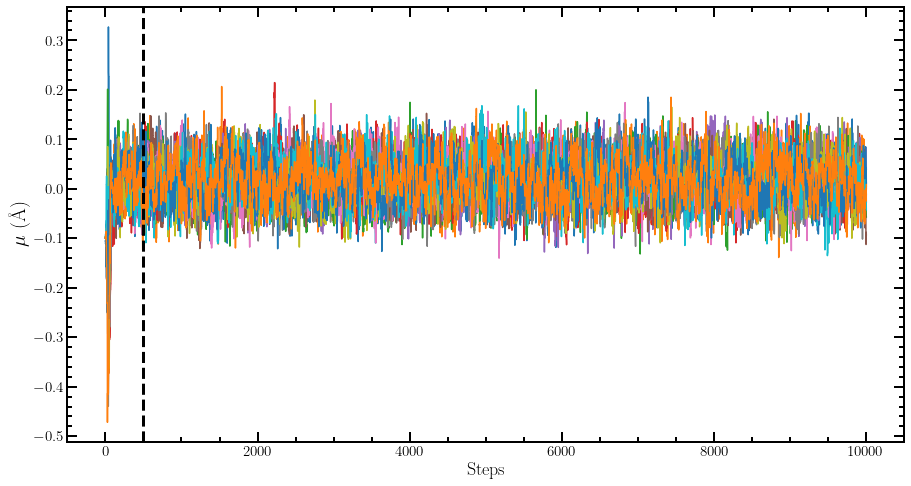

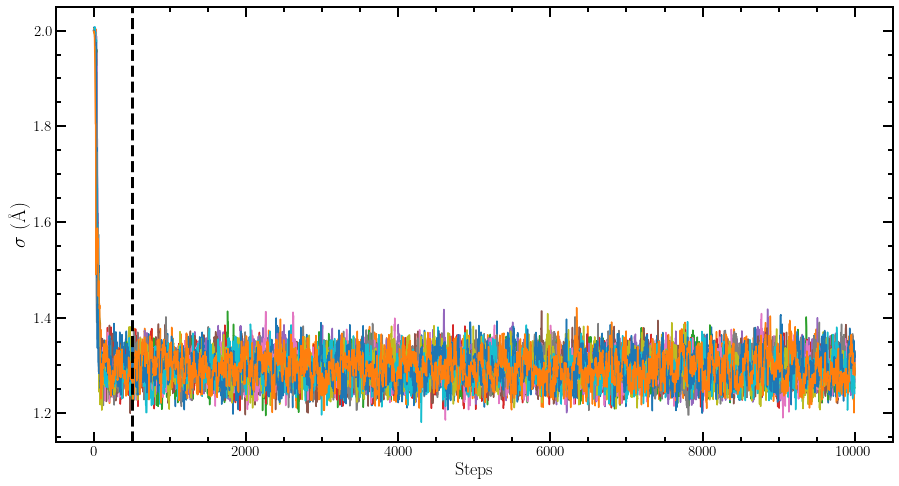

In [6]:
# sampler.chain is of shape (nwalkers, nsteps, ndim)
emcee_trace  = sampler.chain

burn = 0.05*nsteps # just cutting 5 percent of the chains

# plot the μ chain/trace-plot
fig,ax = plt.subplots(figsize=(15,8))
for i in range(nwalkers):
    ax.plot(emcee_trace[i,:,0])
plt.axvline(burn,c='k',ls='--',lw='3')
plt.xlabel('Steps',fontsize=18)
plt.ylabel('$\mu$ (\AA)',fontsize=20)
# plt.savefig('../../../../../../Desktop/8070fig3.pdf',bbox_inches='tight')
plt.show()

# plot the μ chain/trace-plot
fig,ax = plt.subplots(figsize=(15,8))
for i in range(nwalkers):
    ax.plot(emcee_trace[i,:,1])
plt.axvline(burn,c='k',ls='--',lw='3')
plt.xlabel('Steps',fontsize=18)
plt.ylabel('$\sigma$ (\AA)',fontsize=20)
# plt.savefig('../../../../../../Desktop/8070fig4.pdf',bbox_inches='tight')
plt.show()


thin = sampler.get_autocorr_time()
flattened = sampler.get_chain(discard=int(burn), thin=int(max(thin)), flat=True)

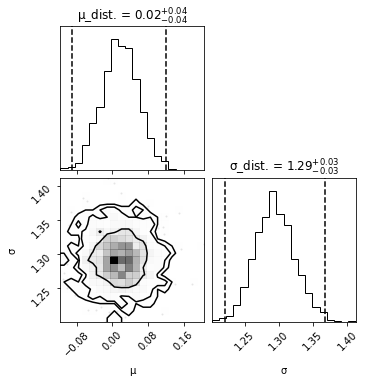

In [5]:
# Make a corner plot
# Corner will complain about the plotting code at the start of this notebook, don't run that code for corner to work
import corner
_ = corner.corner(flattened, quantiles=(0.005, 0.995), levels=(0.68,0.95,0.99), labels=['μ','σ']
                    ,titles=['μ_dist.','σ_dist.'],show_titles=True)
# plt.savefig('../../../../../../Desktop/8070fig5.pdf',bbox_inches='tight')

In [50]:
# plt.scatter(np.arange(nwalkers),sampler.acceptance_fraction)
# plt.ylabel('Acceptance Fraction',fontsize=18)
# plt.xlabel('Walker',fontsize=18)
# plt.savefig('../../../../../../Desktop/8070fig12.pdf',bbox_inches='tight')

### Estimations using Bootstrapping
bootstrapping posteriors for $\mu$ and $\sigma$ of the data 

In [51]:
from scipy import optimize

def ln_likelihood(mu, delta, xi):
    # here, the model parameters are mu and delta
    likelihood = stats.norm.logpdf(xi,loc=mu,scale=delta)
# reason for -ve sign: optimize finds the function minimum, but we want to maximize the ln-likelihood, not minimize it
    return -np.sum(likelihood)

f_lnlike = lambda beta: ln_likelihood(beta[0], beta[1], xi=data) # could put the -ve here instead

# compute the maximum likelihood 
beta0 = [0.0,1.0] # initial guess
beta_lnlike = optimize.fmin(f_lnlike, beta0, disp=False) 

print('best-fit loc. parameter: ',beta_lnlike[0])
print('best-fit scale. parameter: ',beta_lnlike[1])

best-fit loc. parameter:  0.01850506427309306
best-fit scale. parameter:  1.291080134056359


In [56]:
from random import choices

# function to generate 1000 bootstrap realizations of the dataset
def bootsp(data_arr, resample=1000):
    length = len(data_arr)
    data_array = []
    for i in range(resample):
        # sampling indices
        idxs = choices(np.arange(0,length,1),k=length)
        sample_data = data_arr[idxs] 
        # append each bootstrap realization of the data
        data_array.append(sample_data)
    return data_array

# generating 1000 bootstrap realizations of this dataset
bootstrap_data = bootsp(data)

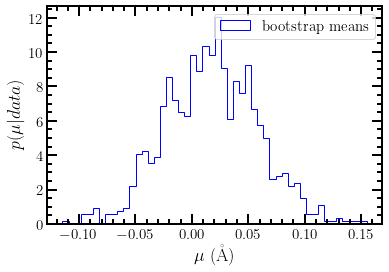

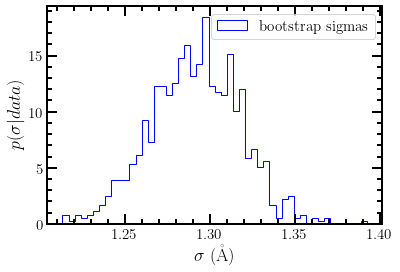

In [57]:
boot_means, boot_sig = [],[]
# using each bootstrap realization of the data, find the best-fit mean and sigma
# the mean and sigma are the model parameters, and we want to map the uncertainties of these parameters

for i in range(len(bootstrap_data)):
#   compute and append the best-fit parameters for mean and sigma    
    f_boot = lambda beta: ln_likelihood(beta[0], beta[1], xi=bootstrap_data[i])
    
    beta0 = [0.0,1.0] # initial guess for mu
    beta_squared = optimize.fmin(f_boot, beta0,disp=False)
    
    boot_means.append(beta_squared[0])
    boot_sig.append(beta_squared[1])

# plot a normalized histogram of the best-fit means from the different bootstrap realizations
plt.hist(boot_means,bins=50,density=True,histtype='step',color='b',label='bootstrap means')
plt.xlabel(r'$\mu$ (\AA)',fontsize=18)
plt.ylabel(r'$p(\mu|data)$',fontsize=18)
plt.legend(loc='upper right')
# plt.savefig('../../../../../../Desktop/8070fig6.pdf',bbox_inches='tight')
plt.show()

# plot a normalized histogram of the best-fit sigmas from the different bootstrap realizations
plt.hist(boot_sig,bins=50,density=True,histtype='step',color='b',label='bootstrap sigmas')
plt.legend(loc='upper right')
plt.xlabel(r'$\sigma$ (\AA)',fontsize=18)
plt.ylabel(r'$p(\sigma|data)$',fontsize=18)
plt.legend(loc='upper right')
# plt.savefig('../../../../../../Desktop/8070fig7.pdf',bbox_inches='tight')
plt.show()

### Confidence Interval for the Sample Mean
#### First Method

lower and upper limits using equation:
-0.08668153120152258 0.1236664558246389

lower and upper limits using np.percentile
[-0.09089105] [0.12049159]


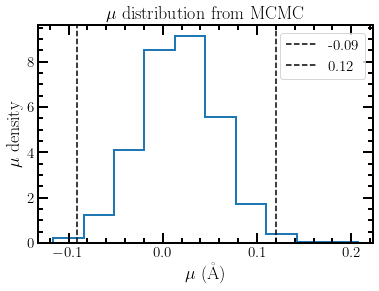

In [49]:
# comparing CI for sample mean (calculated with formula), to CI obtained using np.percentile on the μ posterior. 
# x̄ ± z* σ/√n
print('lower and upper limits using equation:')
print(np.mean(data)-2.576*np.std(data)/np.sqrt(len(data)), np.mean(data)+2.576*np.std(data)/np.sqrt(len(data)))

percent1 = np.percentile(flattened[:,0], q=[0.5])
percent2 = np.percentile(flattened[:,0], q=[99.5])
print('\nlower and upper limits using np.percentile')
print(np.percentile(flattened[:,0], q=[0.5]), np.percentile(flattened[:,0], q=[99.5]))

_ = plt.hist(flattened[:,0],density=True,histtype='step',lw=2)
plt.axvline(percent1,ls='--',c='k',label=str(-0.09))
plt.axvline(percent2,ls='--',c='k',label=str(0.12))
plt.xlabel(r'$\mu$ (\AA)',fontsize=18)
plt.ylabel(r'$\mu$ density',fontsize=18)
plt.title(r'$\mu$ distribution from MCMC')
plt.legend(loc='upper right')
# plt.savefig('../../../../../../Desktop/8070fig8.pdf',bbox_inches = 'tight')
plt.show()

#### Second Method

In [54]:
# CI for shift(\AA)...the stuff I actually want to use in the error propagation
lower_limit = np.mean(flattened[:,0])-2.576*np.mean(flattened[:,1])
upper_limit = np.mean(flattened[:,0])+2.576*np.mean(flattened[:,1])
print(lower_limit)
print(upper_limit)

-3.316167886071057
3.3516259395949235


### Uncertainty due to Noise

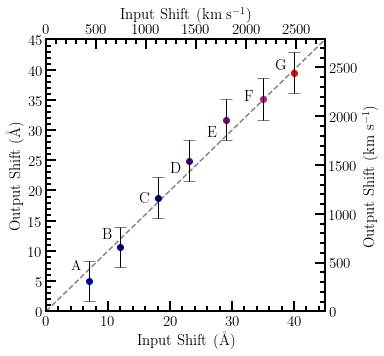

In [55]:
# propagating noise uncertainty to the 99% confidence interval values obtained from fitting a parabola 
# around the minimum Χ^2
plus = np.sqrt(np.array([0.16,0.19,0.59,0.4,0.27,1.18,0.68])**2+(upper_limit)**2)
minus = np.sqrt(np.array([0.16,0.19,0.73,0.39,0.39,0.73,0.77])**2+(lower_limit)**2)
error = ((val+plus)-(val-minus))/2

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot([0,52],[0,52],c='gray',ls='--',zorder=1) # plot a 1:1 line 

for i in range(len(input_shift)):
    ax.scatter(input_shift[i],val[i],c=col2[i],zorder=2)
    (_, caps, _) = ax.errorbar(input_shift[i],val[i], yerr = error[i], c='k',
        capsize=6, elinewidth=1,label='error'+str(i)+'='+str(error[i]))
    for cap in caps:
        cap.set_color('k')
        cap.set_markeredgewidth(0.5)

ax.set_xlabel(r'Input Shift (\AA)',fontsize=15);ax.set_ylabel(r'Output Shift (\AA)',fontsize=15)
ax.tick_params(axis = "both", which = "both", top = False, right = False)
ax.set_xlim(0,45);ax.set_ylim(0,45)

secax = ax.secondary_xaxis('top', functions=(delWtoV, delVtoW))
secax.set_xlabel(r'Input Shift (km s$^{-1}$)')
secax = ax.secondary_yaxis('right', functions=(delWtoV, delVtoW))
secax.set_ylabel(r'Output Shift (km s$^{-1}$)')

forplot = np.polyfit([0,45],[0,45],deg=1)
plotfit = np.poly1d(forplot)
plotyloc = plotfit(input_shift)

plt.text(input_shift[0]-3, plotyloc[0],'A',c='k',fontsize=14)
plt.text(input_shift[1]-3, plotyloc[1],'B',c='k',fontsize=15)
plt.text(input_shift[2]-3, plotyloc[2],'C',c='k',fontsize=15)
plt.text(input_shift[3]-3, plotyloc[3],'D',c='k',fontsize=15)
plt.text(input_shift[4]-3, plotyloc[4],'E',c='k',fontsize=15)
plt.text(input_shift[5]-3, plotyloc[5],'F',c='k',fontsize=15)
plt.text(input_shift[6]-3, plotyloc[6],'G',c='k',fontsize=15)

# plt.savefig("../../../../../../Desktop/8070fig9.pdf",bbox_inches='tight')
plt.show()

### Visualizing MC Data using Optimal Bandwidth

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

xval = np.array(data)
bwrange = np.linspace(0.1, 1.0, 30) # Test 30 bandwidths from 0.1 to 1.0
K = 5 # Do 5-fold cross validation

grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv=K) # Try each bandwidth with K-folds
grid.fit(xval[:, np.newaxis]) #Fit the data.

h_opt = grid.best_params_['bandwidth']
print('Best bandwidth: ',h_opt)

Best bandwidth:  0.1


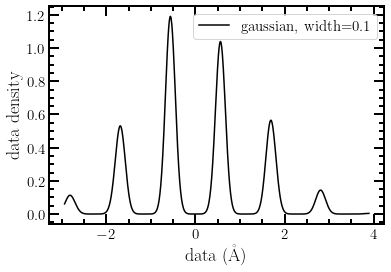

In [46]:
xgrid = np.linspace(xval.min(),xval.max(),1000)

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

PDFgaussian = kde_sklearn(xval,bandwidth=0.1,kernel="gaussian") 
plt.plot(xgrid,PDFgaussian,label="gaussian, width=0.1",c='k') 
plt.xlabel('data (\AA)',fontsize=18)
plt.ylabel('data density',fontsize=18)
plt.legend(loc="upper right")
# plt.savefig('../../../../../../Desktop/8070fig10.pdf',bbox_inches='tight')
plt.show()